In [2]:
# import necessary libraries

import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization

from PIL import Image
import cv2

In [3]:
df = pd.read_json("photos.json", lines=True)

In [4]:
print(f"The dimensions of photos.json are {df.shape[0]} lines and {df.shape[1]} rows.")
df.head(5)

The dimensions of photos.json are 200100 lines and 4 rows.


,photo_id,business_id,caption,label
0,zsvj7vloL4L5jhYyPIuVwg,Nk-SJhPlDBkAZvfsADtccA,Nice rock artwork everywhere and craploads of ...,inside
1,HCUdRJHHm_e0OCTlZetGLg,yVZtL5MmrpiivyCIrVkGgA,,outside
2,vkr8T0scuJmGVvN2HJelEA,_ab50qdWOk0DdB6XOrBitw,oyster shooter,drink
3,pve7D6NUrafHW3EAORubyw,SZU9c8V2GuREDN5KgyHFJw,Shrimp scampi,food
4,H52Er-uBg6rNrHcReWTD2w,Gzur0f0XMkrVxIwYJvOt2g,,food


In [5]:
labels = df.label.unique().tolist()
labels

['inside', 'outside', 'drink', 'food', 'menu']

In [6]:
sample_df = pd.DataFrame()

for label in labels:
    label_df = df[df["label"] == label].sample(100, random_state=42)
    sample_df = sample_df.append(label_df, ignore_index=True)

C:\Users\Katrin\AppData\Local\Temp\ipykernel_11236\3178993935.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_df = sample_df.append(label_df, ignore_index=True)


In [7]:
sample_df

,photo_id,business_id,caption,label
0,cO58-hmFkBxDUQ4B0p40AA,v8IBu8Td9IuIvbcmHv9ZRA,You can bring in a framed pic of your pup to p...,inside
1,7_hiXIbS5Ub0_eiRxr5COg,7rMxt2f3uvC6xPQtHgQKLQ,,inside
2,XseBUNM81RxxtfDgyjxXiA,Uw46n__imJ52D7Zh1vJVrQ,The Cowgirl's bathroom looks like a barn with ...,inside
3,_IRUZoGYSr9bICvBJrPnhw,3oFE-751lsSdkggDd7L-aw,We ID.,inside
4,x8xVVzTI3yW5xZraRZNxfQ,NetawOi6wDa1mGJumW4-zQ,,inside
...,...,...,...,...
495,TrrpkyWzJA1sAY7po9wWNg,xKiTLjsWMHoeutot6lPZIw,Tap List,menu
496,Kq8cwjZdFqRKsssjAfzWdQ,-iGzevsRYAi990-Lt-iMoQ,,menu
497,Ao5u47KHjqq5mKQYuU4pIQ,sihT-_DtwOdnDDDJbXN22A,,menu
498,uSbyFRqroJJsaSfOO_5Ucg,XQoSWEyIGHMIZKxLZOpXSg,,menu


In [8]:
import os

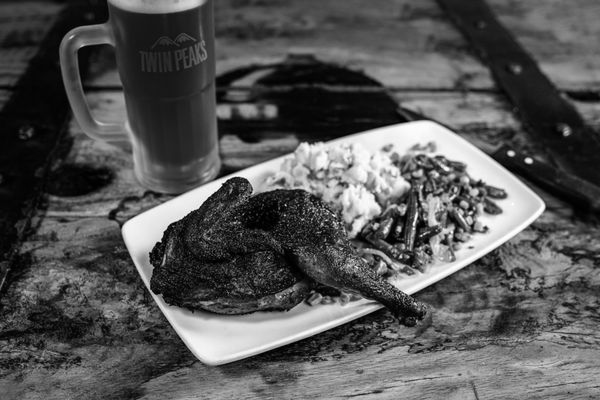

In [9]:
directory = "C:/Users/Katrin/Downloads/yelp_photos/photos/"
from PIL import ImageOps
img = Image.open(directory + sample_df.photo_id.iloc[300] + ".jpg")
img = ImageOps.grayscale(img)
img

In [10]:
# Afficher son mode de quantification
print("Format des pixels : {}".format(img.mode))

# Récupérer et afficher la valeur du pixel à une position précise
px_value = img.getpixel((20,100))
print("Valeur du pixel situé en (20,100) : {}".format(px_value))

Format des pixels : L
Valeur du pixel situé en (20,100) : 6


In [11]:
import numpy as np

# Récupérer les valeurs de tous les pixels sous forme d'une matrice
mat = np.array(img)
mat

# Afficher la taille de la matrice de pixels
print("Taille de la matrice de pixels : {}".format(mat.shape))

Taille de la matrice de pixels : (400, 600)


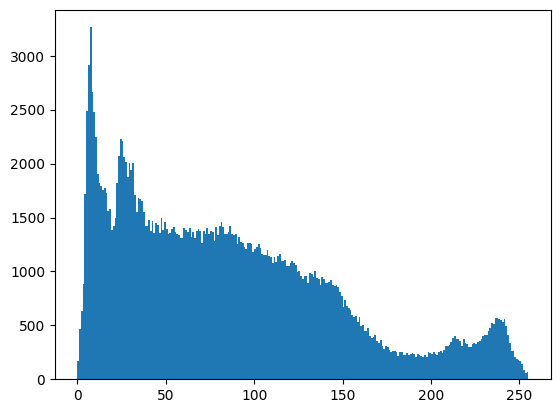

In [12]:
import matplotlib.pyplot as plt
# Charger l'image comme matrice de pixels
img_np = np.array(img)
# Générer et afficher l'histogramme
# Pour le normaliser : argument density=True dans plt.hist
# Pour avoir l'histogramme cumulé : argument cumulative=True
n, bins, patches = plt.hist(img_np.flatten(), bins=range(256))
plt.show()

In [13]:
img = ImageOps.autocontrast(img)
img = ImageOps.equalize(img)

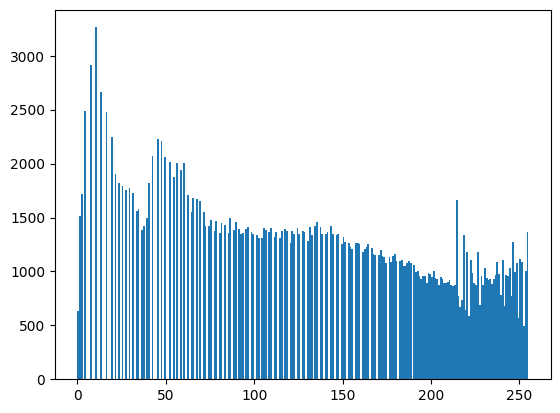

In [14]:
# Charger l'image comme matrice de pixels
img_np = np.array(img)
# Générer et afficher l'histogramme
# Pour le normaliser : argument density=True dans plt.hist
# Pour avoir l'histogramme cumulé : argument cumulative=True
n, bins, patches = plt.hist(img_np.flatten(), bins=range(256))
plt.show()

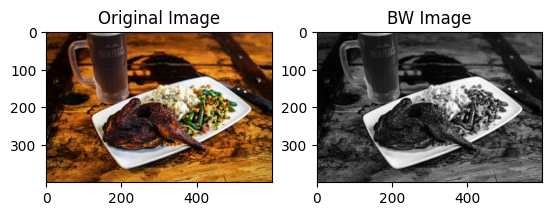

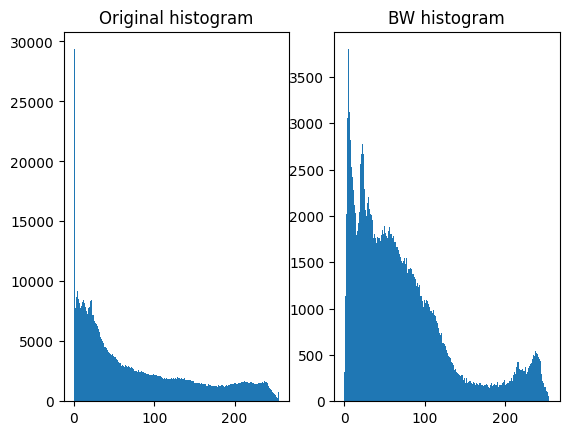

In [15]:
image_color = cv2.cvtColor(cv2.imread(directory + sample_df.photo_id.iloc[300] + ".jpg"), cv2.COLOR_BGR2RGB)
image_bw = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

images = []
images.append(image_color)
images.append(image_bw)

titles= ['Original Image', 'BW Image']

for i in range(len(images)):
    plt.subplot(1,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    # plt.xticks([]),plt.yticks([])

plt.show()

image_color_np = np.array(image_color)
image_bw_np = np.array(image_bw)
images_np = []
images_np.append(image_color_np)
images_np.append(image_bw_np)

titles_hist = ['Original histogram', 'BW histogram']

for i in range(len(images_np)):
    plt.subplot(1,2,i+1),plt.hist(images_np[i].flatten(), bins=range(256))
    plt.title(titles_hist[i])
plt.show()

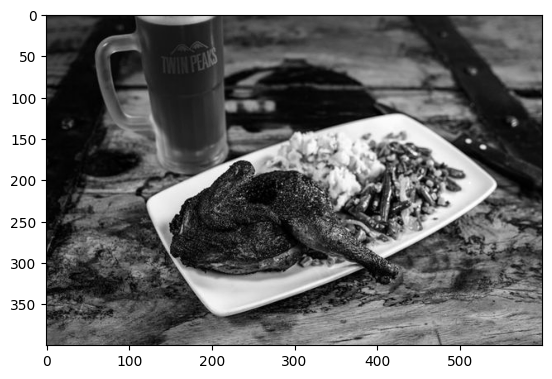

In [16]:
image = cv2.imread(directory + sample_df.photo_id.iloc[300] + ".jpg", 0)
plt.imshow(image, cmap='gray', vmin = 0, vmax = 255)

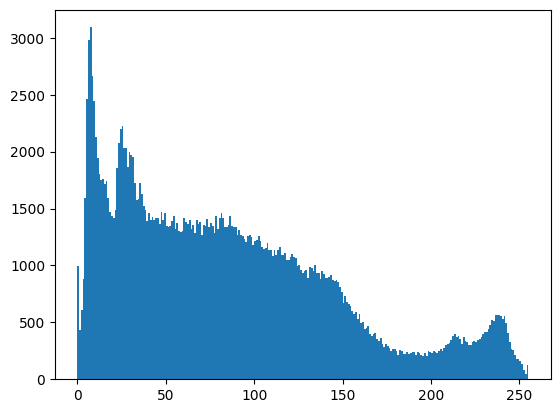

In [17]:
# Charger l'image comme matrice de pixels
img_np = np.array(image)
# Générer et afficher l'histogramme
# Pour le normaliser : argument density=True dans plt.hist
# Pour avoir l'histogramme cumulé : argument cumulative=True
n, bins, patches = plt.hist(img_np.flatten(), bins=range(256))
plt.show()

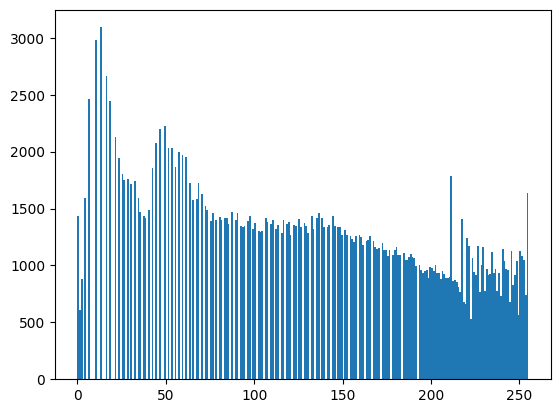

In [18]:
image = cv2.equalizeHist(image)

img_np = np.array(image)
n, bins, patches = plt.hist(img_np.flatten(), bins=range(256))
plt.show()

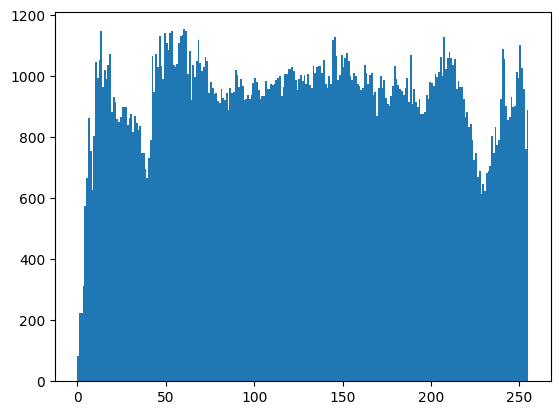

In [19]:
image = cv2.blur(image, (3,3))

img_np = np.array(image)
n, bins, patches = plt.hist(img_np.flatten(), bins=range(256))
plt.show()

"ORB performs as well as SIFT on the task of feature detection (and is better than SURF) while being almost two orders of magnitude faster."

In [20]:
orb = cv2.ORB_create()
keypoints = orb.detect(image,None)
keypoints, descriptors = orb.compute(image, keypoints)

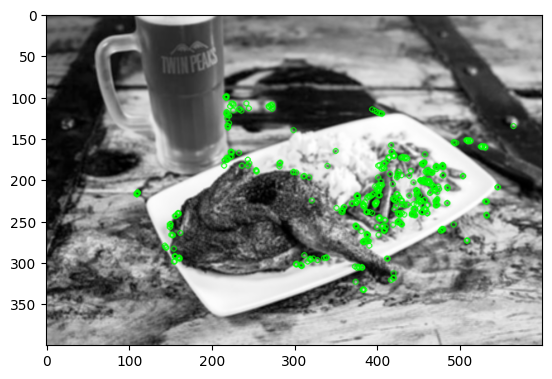

(<matplotlib.image.AxesImage at 0x124f3f11f00>, None)

In [21]:
image2 = cv2.drawKeypoints(image, keypoints, None, color=(0,255,0), flags=0)
plt.imshow(image2), plt.show()

In [22]:
descriptors

array([[  7, 150,  61, ..., 219, 161, 241],
       [189,  96,  37, ..., 185,  80, 160],
       [107, 178, 126, ..., 143,  71, 241],
       ...,
       [  6, 179, 189, ...,   8, 165, 247],
       [ 77,  29, 127, ..., 235,  66,  99],
       [  7, 123, 234, ..., 123, 243, 213]], dtype=uint8)

In [23]:
# calculer les descripteurs pour les images

# KMeans pour clusteriser les descripteurs (minibatchKmeans)

# reduire le nb de dimensions avec ACP

# reduire l espace de dimensions avec TSNE 



### Create an array of images in numpy array format

In [24]:
sample_df.shape[0]

500

In [106]:
sample_images = []

for i in range(0,500):
    # img = Image.open(directory + sample_df.photo_id.iloc[i] + ".jpg")
    img = cv2.imread(directory + sample_df.photo_id.iloc[i] + ".jpg", 0)
    # img = ImageOps.grayscale(img)
    # img_resized = img.reshape((-1,3))
    # img_resized = cv2.resize(img, (250,250))
    img_np = np.array(img)
    img_np = cv2.equalizeHist(img_np)
    # img_np = np.float32(img_np)
    sample_images.append(img_np)

In [107]:
sample_df["np_image"] = sample_images
sample_df.head()

,photo_id,business_id,caption,label,np_image,descriptor
0,cO58-hmFkBxDUQ4B0p40AA,v8IBu8Td9IuIvbcmHv9ZRA,You can bring in a framed pic of your pup to p...,inside,"[[115, 115, 114, 112, 109, 108, 106, 104, 103,...","[[147, 121, 117, 65, 11, 23, 141, 93, 84, 240,..."
1,7_hiXIbS5Ub0_eiRxr5COg,7rMxt2f3uvC6xPQtHgQKLQ,,inside,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[244, 73, 43, 126, 156, 196, 71, 236, 225, 20..."
2,XseBUNM81RxxtfDgyjxXiA,Uw46n__imJ52D7Zh1vJVrQ,The Cowgirl's bathroom looks like a barn with ...,inside,"[[210, 253, 247, 104, 92, 210, 232, 248, 162, ...","[[1, 247, 145, 33, 176, 175, 103, 159, 62, 171..."
3,_IRUZoGYSr9bICvBJrPnhw,3oFE-751lsSdkggDd7L-aw,We ID.,inside,"[[149, 153, 159, 163, 161, 153, 142, 128, 106,...","[[6, 104, 234, 129, 214, 135, 184, 206, 30, 24..."
4,x8xVVzTI3yW5xZraRZNxfQ,NetawOi6wDa1mGJumW4-zQ,,inside,"[[162, 162, 156, 145, 138, 130, 113, 89, 86, 7...","[[62, 245, 185, 226, 173, 109, 215, 205, 203, ..."


### Get descriptors for each image in sample_images

In [248]:
descriptors = []
keypoints = []

orb = cv2.ORB_create(nfeatures=100)

for img in sample_images:
    kp = orb.detect(img,None)
    kp, des = orb.compute(img, kp)
    descriptors.append(des)
    keypoints.append(kp)

In [249]:
all_descriptors = np.concatenate(descriptors, axis=0)
print()
print("Nombre de descripteurs : ", all_descriptors.shape)


Nombre de descripteurs :  (49811, 32)


In [251]:
from sklearn import cluster

In [253]:
k = int(round(np.sqrt(len(all_descriptors)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

kmeans = cluster.MiniBatchKMeans(n_clusters=k)
kmeans.fit(all_descriptors)

Nombre de clusters estimés :  223
Création de 223 clusters de descripteurs ...


MiniBatchKMeans(n_clusters=223)

In [198]:
# def keep_good_descriptors(array_desc, array_kp):
#     response = array_desc
#     dkr = pd.DataFrame(data={'desc':array_desc, 'kp':array_kp, 'resp':response})
#     # for i in range(len(array_kp)):
#     for i in range(dkr.shape[0]):
#         dkr.resp.iloc[i] = dkr.kp[i].response
#         # desc.append(array_kp[i].response)
#         # desc.sort(reverse=True)
#         dkr.sort_values(by=resp, ascending=True)
#         # desc = desc[:30]
#     print(drk)

# keep_good_descriptors(sample_df.descriptor.iloc[0], sample_df.keypoint.iloc[0])

ValueError: Per-column arrays must each be 1-dimensional

In [167]:
array_desc = sample_df.descriptor.iloc[0]
array_kp = sample_df.keypoint[0]

desc = []

In [171]:
array_kp[0].response

0.007630891166627407

In [163]:
len(sample_df.keypoint.iloc[0])

100

In [133]:
keypoints[0][0].response

0.007630891166627407

In [134]:
sample_df.descriptor.iloc[0]

array([[231, 239, 129, ..., 126, 249, 213],
       [194, 251,  16, ...,   6, 139,  15],
       [ 59, 150, 239, ..., 172, 124, 125],
       ...,
       [253, 148,  33, ..., 101, 242, 118],
       [245,  27,  70, ..., 161, 242,  17],
       [235,  73, 103, ..., 253, 112, 125]], dtype=uint8)

In [135]:
sample_df.keypoint.iloc[0]

(< cv2.KeyPoint 00000124820B37E0>,
 < cv2.KeyPoint 00000124820B3810>,
 < cv2.KeyPoint 00000124820B3840>,
 < cv2.KeyPoint 00000124820B3870>,
 < cv2.KeyPoint 00000124820B3D50>,
 < cv2.KeyPoint 00000124820B3D80>,
 < cv2.KeyPoint 00000124820B3DB0>,
 < cv2.KeyPoint 00000124820B3DE0>,
 < cv2.KeyPoint 00000124820B3E10>,
 < cv2.KeyPoint 00000124820B3E40>,
 < cv2.KeyPoint 00000124820B3E70>,
 < cv2.KeyPoint 00000124820B3EA0>,
 < cv2.KeyPoint 00000124820B3ED0>,
 < cv2.KeyPoint 00000124820B3F00>,
 < cv2.KeyPoint 00000124820B3F30>,
 < cv2.KeyPoint 00000124820B3F60>,
 < cv2.KeyPoint 00000124820B3F90>,
 < cv2.KeyPoint 00000124820B3FC0>,
 < cv2.KeyPoint 00000124820B38A0>,
 < cv2.KeyPoint 00000124820B38D0>,
 < cv2.KeyPoint 00000124820B3900>,
 < cv2.KeyPoint 00000124820B3930>,
 < cv2.KeyPoint 00000124820B3960>,
 < cv2.KeyPoint 00000124820B3990>,
 < cv2.KeyPoint 00000124820B39C0>,
 < cv2.KeyPoint 00000124820B39F0>,
 < cv2.KeyPoint 00000124820B3A20>,
 < cv2.KeyPoint 00000124820B3A50>,
 < cv2.KeyPoint 0000

In [201]:
sample_df["descriptor"] = descriptors
sample_df["keypoint"] = keypoints
sample_df.head()

,photo_id,business_id,caption,label,np_image,descriptor,keypoint
0,cO58-hmFkBxDUQ4B0p40AA,v8IBu8Td9IuIvbcmHv9ZRA,You can bring in a framed pic of your pup to p...,inside,"[[115, 115, 114, 112, 109, 108, 106, 104, 103,...","[[61, 111, 108, 101, 236, 27, 238, 252, 64, 24...","(< cv2.KeyPoint 0000012561BF6580>, < cv2.KeyPo..."
1,7_hiXIbS5Ub0_eiRxr5COg,7rMxt2f3uvC6xPQtHgQKLQ,,inside,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[110, 185, 163, 200, 237, 220, 95, 251, 139, ...","(< cv2.KeyPoint 0000012561C196B0>, < cv2.KeyPo..."
2,XseBUNM81RxxtfDgyjxXiA,Uw46n__imJ52D7Zh1vJVrQ,The Cowgirl's bathroom looks like a barn with ...,inside,"[[210, 253, 247, 104, 92, 210, 232, 248, 162, ...","[[89, 25, 18, 118, 83, 252, 118, 81, 169, 64, ...","(< cv2.KeyPoint 0000012561C1A970>, < cv2.KeyPo..."
3,_IRUZoGYSr9bICvBJrPnhw,3oFE-751lsSdkggDd7L-aw,We ID.,inside,"[[149, 153, 159, 163, 161, 153, 142, 128, 106,...","[[255, 84, 248, 28, 11, 116, 81, 10, 187, 95, ...","(< cv2.KeyPoint 0000012561C1BC30>, < cv2.KeyPo..."
4,x8xVVzTI3yW5xZraRZNxfQ,NetawOi6wDa1mGJumW4-zQ,,inside,"[[162, 162, 156, 145, 138, 130, 113, 89, 86, 7...","[[170, 89, 228, 87, 205, 81, 148, 103, 207, 24...","(< cv2.KeyPoint 0000012561DC4BD0>, < cv2.KeyPo..."


In [203]:
sample_df.descriptor = sample_df.descriptor.apply(lambda x: x.flatten())

### Clustering descriptor

In [219]:
sample_df.head()

,photo_id,business_id,caption,label,np_image,descriptor,keypoint
0,cO58-hmFkBxDUQ4B0p40AA,v8IBu8Td9IuIvbcmHv9ZRA,You can bring in a framed pic of your pup to p...,inside,"[[115, 115, 114, 112, 109, 108, 106, 104, 103,...","[61.0, 111.0, 108.0, 101.0, 236.0, 27.0, 238.0...","(< cv2.KeyPoint 0000012561BF6580>, < cv2.KeyPo..."
1,7_hiXIbS5Ub0_eiRxr5COg,7rMxt2f3uvC6xPQtHgQKLQ,,inside,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[110.0, 185.0, 163.0, 200.0, 237.0, 220.0, 95....","(< cv2.KeyPoint 0000012561C196B0>, < cv2.KeyPo..."
2,XseBUNM81RxxtfDgyjxXiA,Uw46n__imJ52D7Zh1vJVrQ,The Cowgirl's bathroom looks like a barn with ...,inside,"[[210, 253, 247, 104, 92, 210, 232, 248, 162, ...","[89.0, 25.0, 18.0, 118.0, 83.0, 252.0, 118.0, ...","(< cv2.KeyPoint 0000012561C1A970>, < cv2.KeyPo..."
3,_IRUZoGYSr9bICvBJrPnhw,3oFE-751lsSdkggDd7L-aw,We ID.,inside,"[[149, 153, 159, 163, 161, 153, 142, 128, 106,...","[255.0, 84.0, 248.0, 28.0, 11.0, 116.0, 81.0, ...","(< cv2.KeyPoint 0000012561C1BC30>, < cv2.KeyPo..."
4,x8xVVzTI3yW5xZraRZNxfQ,NetawOi6wDa1mGJumW4-zQ,,inside,"[[162, 162, 156, 145, 138, 130, 113, 89, 86, 7...","[170.0, 89.0, 228.0, 87.0, 205.0, 81.0, 148.0,...","(< cv2.KeyPoint 0000012561DC4BD0>, < cv2.KeyPo..."


In [214]:
sample_df.descriptor = sample_df.descriptor.apply(lambda x: x[:2000])

In [215]:
np.unique(list(map(len, sample_df.descriptor)))

array([2000])

In [218]:
sample_df.descriptor = sample_df.descriptor.apply(lambda x: np.float32(x))

In [233]:
sample_df.descriptor = sample_df.descriptor.astype(object)

In [247]:
sample_df.descriptor

0      [61.0, 111.0, 108.0, 101.0, 236.0, 27.0, 238.0...
1      [110.0, 185.0, 163.0, 200.0, 237.0, 220.0, 95....
2      [89.0, 25.0, 18.0, 118.0, 83.0, 252.0, 118.0, ...
3      [255.0, 84.0, 248.0, 28.0, 11.0, 116.0, 81.0, ...
4      [170.0, 89.0, 228.0, 87.0, 205.0, 81.0, 148.0,...
                             ...                        
495    [24.0, 165.0, 41.0, 235.0, 13.0, 117.0, 79.0, ...
496    [183.0, 213.0, 110.0, 94.0, 155.0, 86.0, 95.0,...
497    [61.0, 23.0, 103.0, 204.0, 52.0, 166.0, 71.0, ...
498    [81.0, 4.0, 143.0, 37.0, 40.0, 46.0, 72.0, 42....
499    [2.0, 201.0, 16.0, 139.0, 149.0, 199.0, 186.0,...
Name: descriptor, Length: 500, dtype: object

In [246]:
X = np.array(sample_df.descriptor)
X

array([array([ 61., 111., 108., ..., 231., 200., 116.], dtype=float32),
       array([110., 185., 163., ..., 166., 180., 229.], dtype=float32),
       array([ 89.,  25.,  18., ..., 248.,  55.,  10.], dtype=float32),
       array([255.,  84., 248., ..., 207., 177.,  96.], dtype=float32),
       array([170.,  89., 228., ..., 249.,  55., 107.], dtype=float32),
       array([ 92.,  22., 191., ..., 104., 125.,   3.], dtype=float32),
       array([ 52., 171.,  11., ..., 155.,  66.,  24.], dtype=float32),
       array([ 69.,  57.,  57., ..., 115.,  21.,  54.], dtype=float32),
       array([133., 222., 158., ..., 151., 193., 232.], dtype=float32),
       array([206., 206., 238., ...,  23., 136., 121.], dtype=float32),
       array([138., 130., 198., ..., 101., 179., 197.], dtype=float32),
       array([120., 248., 189., ...,  51.,   1., 223.], dtype=float32),
       array([ 40., 191., 121., ..., 200., 122.,   0.], dtype=float32),
       array([ 41., 181.,  83., ..., 254., 110., 192.], dtype=fl

In [53]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [234]:
KMeans().fit(sample_df.descriptor)

ValueError: setting an array element with a sequence.